# Data Wrangling<a id='Data_Wrangling'></a>

## Table of Contents<a id='Table of Contents'></a>
* [Data wrangling](#Data_Wrangling)
  * [Table of Contents](#2.1_Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_The_Data)
  * [Missing Data](#Missing_Data)
  * [Investigate the Other Diagnosis Field](#Investigate_OD_Field)
  * [Investigate the rest of the columns](#Investigate_Other_Columns)
  * [Save the data](#Save_Data)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

This notebook will be cleaning the data from https://ridesdatabase.org/saferparks/data/ for the 2018 NEISS Analysis that includes data from 2013-2017 for injuries sustained from different theme park rides. 

The Data Dictionary can be found in the data folder, and it comes from the original website: https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data

## Imports<a id='Imports'></a>

In [1]:
#Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

## Load The Data<a id='Load_The_Data'></a>

In [2]:
# The supplied CSV data file is in the raw_data directory. Reading it into the inj_data dataframe
inj_data = pd.read_csv('data/raw_data/Saferparks-dataset-neiss.csv')

In [3]:
#See all data types.
#Things to note:
#Null values in Other_Diagnosis need to be investigated for why there are null values
#ProductCode is currently an int, but it may make more sense as a category/string type instead. 
inj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6584 entries, 0 to 6583
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Treatment_Date    6584 non-null   object 
 1   Age               6584 non-null   int64  
 2   Sex               6584 non-null   object 
 3   Narrative         6584 non-null   object 
 4   Diagnosis         6584 non-null   object 
 5   Other_Diagnosis   986 non-null    object 
 6   BodyPart          6584 non-null   object 
 7   Disposition       6584 non-null   object 
 8   ProductCode       6584 non-null   int64  
 9   Device_category   6584 non-null   object 
 10  Device_type       6584 non-null   object 
 11  Location          6584 non-null   object 
 12  Stratum           6584 non-null   object 
 13  PSU               6584 non-null   int64  
 14  Weight            6584 non-null   float64
 15  CPSC_Case_Number  6584 non-null   int64  
dtypes: float64(1), int64(4), object(11)
memory

In [4]:
#Initial view of the data
inj_data.head()

,Treatment_Date,Age,Sex,Narrative,Diagnosis,Other_Diagnosis,BodyPart,Disposition,ProductCode,Device_category,Device_type,Location,Stratum,PSU,Weight,CPSC_Case_Number
0,12/31/2017,3,F,3 YOF JUMPING BOUNCE HOUSE W/MOM JUMPED UP LAN...,Fracture,NaN,"Leg, lower",Treated and released,1293,Inflatables,inflatable,Sports/recreation,C,32,4.7570,180125260
1,12/31/2017,10,F,10YOF PLAYING *** AT *** AT A PARTY AT *** LOC...,Dental injury,NaN,Mouth,Treated and released,1293,Not identified or unrelated,not identified,Sports/recreation,C,8,4.7570,180108428
2,12/31/2017,14,M,14YOM- PT WAS PLAYING *** TODAY SWELLING TO RI...,Other,TENDONITIS,Knee,Treated and released,1293,Not identified or unrelated,not identified,Sports/recreation,C,90,4.7570,180120413
3,12/30/2017,2,F,2 YOF JUMPING IN BOUNCE HOUSE LANDED AWKWARDLY...,Fracture,NaN,"Leg, lower",Treated and released,1293,Inflatables,inflatable,Sports/recreation,C,32,4.7570,180125238
4,12/30/2017,17,F,"17YOF DRIVING GO CART, RAN INTO BARRIER, HIT L...","Strain, sprain",NaN,Hand,Treated and released,3259,Go karts,go kart,Sports/recreation,M,54,79.1731,180135290


## Missing Data<a id='Missing_Data'></a>

In [5]:
#Confirm which values are missing. Confirmed that Other_Diagnosis has 5598 missing values
missing = pd.concat([inj_data.isnull().sum(), 100 * inj_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Other_Diagnosis,5598,85.024301
Treatment_Date,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Narrative,0,0.000000
Diagnosis,0,0.000000
BodyPart,0,0.000000
Disposition,0,0.000000
ProductCode,0,0.000000
Device_category,0,0.000000


In [6]:
#View all "object" data types to see if anything looks out of place. Fields all seem relatively clean and consistent. 
#Noticed here that Other_Diagnosis has a non-null value of "TENDONITIS" for the Diagnosis code of "Other". 
#Will need to investigate if that is the reason for all the null values in Other_Diagnosis.
inj_data.select_dtypes('object')

,Treatment_Date,Sex,Narrative,Diagnosis,Other_Diagnosis,BodyPart,Disposition,Device_category,Device_type,Location,Stratum
0,12/31/2017,F,3 YOF JUMPING BOUNCE HOUSE W/MOM JUMPED UP LAN...,Fracture,NaN,"Leg, lower",Treated and released,Inflatables,inflatable,Sports/recreation,C
1,12/31/2017,F,10YOF PLAYING *** AT *** AT A PARTY AT *** LOC...,Dental injury,NaN,Mouth,Treated and released,Not identified or unrelated,not identified,Sports/recreation,C
2,12/31/2017,M,14YOM- PT WAS PLAYING *** TODAY SWELLING TO RI...,Other,TENDONITIS,Knee,Treated and released,Not identified or unrelated,not identified,Sports/recreation,C
3,12/30/2017,F,2 YOF JUMPING IN BOUNCE HOUSE LANDED AWKWARDLY...,Fracture,NaN,"Leg, lower",Treated and released,Inflatables,inflatable,Sports/recreation,C
4,12/30/2017,F,"17YOF DRIVING GO CART, RAN INTO BARRIER, HIT L...","Strain, sprain",NaN,Hand,Treated and released,Go karts,go kart,Sports/recreation,M
...,...,...,...,...,...,...,...,...,...,...,...
6579,1/3/2013,M,"DX CONTU CHEST WALL: 56YOM GO-CART RACING, HIT...","Contusion, abrasion",NaN,"Trunk, upper",Treated and released,Go karts,go kart,Sports/recreation,V
6580,1/2/2013,F,12YO F WAS PLAYING *** WHEN BUMPED ELBOW ON GU...,Laceration,NaN,Elbow,Treated and released,Not identified or unrelated,not identified,Sports/recreation,L
6581,1/2/2013,M,DX ACITE EXACERBATOPM PF CHR LBP/SCIATICA/RADI...,Nerve damage,NaN,"Trunk, lower",Treated and released,Not identified or unrelated,not identified,Sports/recreation,V
6582,1/1/2013,M,6YOM PLAYING IN A BOUNCE HOUSE AND HIT HEAD SU...,Hematoma,NaN,Face,Treated and released,Inflatables,inflatable,Sports/recreation,S


## Investigate the "Other Diagnosis Field"<a id='Investigate_OD_Field'></a>

In [7]:
#Are all Diagnosis that are "Other" the ones that have non null data for Other Diagnosis? 
#If that is the case, could potentially merge that data into Diagnsosis and not have an Other column.
#We know from the above statistics that there are 986 non null values in Other Diagnosis. 
#We want to see if that matches all the non null values for a Diagnosis of "Other"

other_diagnosis = inj_data[inj_data['Diagnosis'] == "Other"] #Pull all the fields with "Other" as Diagnosis

#Check to see how many rows there are. 968 rows which matches the non null values in Other Diagnosis
print("Other Diagnosis Rows = "+str(len(other_diagnosis.index))) 

#See how many unique values are in Other Diagnosis. 
#We do this to see if it would be practical to merge the data or not with the original Diagnosis column. 
print('Unique Values in Other Diagnosis: '+ str(other_diagnosis['Other_Diagnosis'].nunique()))

#See how many unique values are in the normal Diagnosis Field
print('Unique Values in Diagnosis: '+ str(inj_data['Diagnosis'].nunique()))

Other Diagnosis Rows = 986
Unique Values in Other Diagnosis: 240
Unique Values in Diagnosis: 27


If we replaced 'Other' in Diagnosis with what is in Other Diagnosis, we would create 240 extra unique values. That would be too many to analyze, so will keep them as 'Other' and it will be used for non common codes. Will keep the null values in Other_Diagnosis as they are valid null data points. 

In [8]:
#View the data again
inj_data.head()

,Treatment_Date,Age,Sex,Narrative,Diagnosis,Other_Diagnosis,BodyPart,Disposition,ProductCode,Device_category,Device_type,Location,Stratum,PSU,Weight,CPSC_Case_Number
0,12/31/2017,3,F,3 YOF JUMPING BOUNCE HOUSE W/MOM JUMPED UP LAN...,Fracture,NaN,"Leg, lower",Treated and released,1293,Inflatables,inflatable,Sports/recreation,C,32,4.7570,180125260
1,12/31/2017,10,F,10YOF PLAYING *** AT *** AT A PARTY AT *** LOC...,Dental injury,NaN,Mouth,Treated and released,1293,Not identified or unrelated,not identified,Sports/recreation,C,8,4.7570,180108428
2,12/31/2017,14,M,14YOM- PT WAS PLAYING *** TODAY SWELLING TO RI...,Other,TENDONITIS,Knee,Treated and released,1293,Not identified or unrelated,not identified,Sports/recreation,C,90,4.7570,180120413
3,12/30/2017,2,F,2 YOF JUMPING IN BOUNCE HOUSE LANDED AWKWARDLY...,Fracture,NaN,"Leg, lower",Treated and released,1293,Inflatables,inflatable,Sports/recreation,C,32,4.7570,180125238
4,12/30/2017,17,F,"17YOF DRIVING GO CART, RAN INTO BARRIER, HIT L...","Strain, sprain",NaN,Hand,Treated and released,3259,Go karts,go kart,Sports/recreation,M,54,79.1731,180135290


## Investigate the rest of the columns<a id='Investigate_Other_Columns'></a>

In [9]:
#Check for duplicate rows. We find that there are no duplicate rows in the dataset. 
duplicates = inj_data.duplicated(keep = False)
inj_data[duplicates]

,Treatment_Date,Age,Sex,Narrative,Diagnosis,Other_Diagnosis,BodyPart,Disposition,ProductCode,Device_category,Device_type,Location,Stratum,PSU,Weight,CPSC_Case_Number


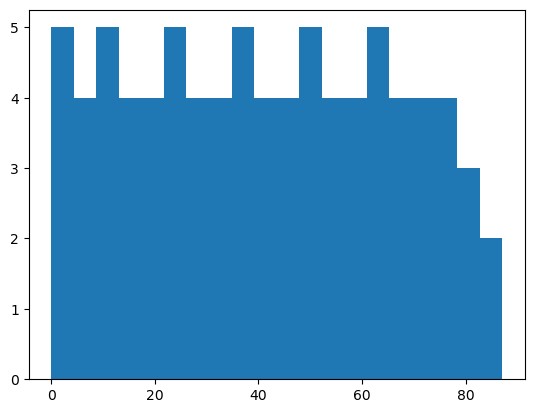

In [10]:
#All valid age ranges. 
plt.clf()
plt.hist(inj_data['Age'].unique(),bins = 20)
plt.show()

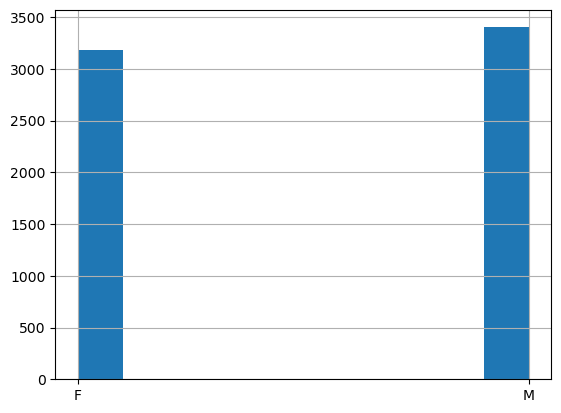

In [11]:
#All valid genders of Female and Male. 
plt.clf()
inj_data['Sex'].hist()
plt.show()

In [12]:
#With the Diagnosis Column, we see various different kinds. 
#There are some that only have a couple of rows so it may make sense to include those with the Other column as well. 
#We will hold off for now though as nothing appears to be out of the ordinary. 
inj_data['Diagnosis'].value_counts()

Strain, sprain                1391
Fracture                      1280
Contusion, abrasion           1030
Other                          986
Laceration                     660
Internal injury                540
Concussion                     233
Dislocation                    140
Dental injury                   73
Hematoma                        48
Burn, thermal                   43
Dermatitis, conjunctivitis      33
Crushing                        22
Avulsion                        21
Foreign body                    18
Nerve damage                    17
Puncture                        11
Hemorrhage                       9
Amputation                       9
Submersion                       6
Radiation                        3
Electric shock                   3
Anoxia                           2
Aspiration                       2
Poisoning                        2
Ingestion                        1
Burn, chemical                   1
Name: Diagnosis, dtype: int64

In [13]:
#Viewing all the unique values of Other_Diagnosis shows there are many different types. 
#We see all of them are capitalized. 
#We do not see any formatting issues. 
#There are some abbreviations that may be vague that could have more info such as H/A, AMS, N/S. 
#We will leave them alone for now as we are most likely going to be using the Diagnosis field instead 
#and these would all fall under "Other".
inj_data['Other_Diagnosis'].unique()

array([nan, 'TENDONITIS', 'PAIN', 'NS', 'TORTICOLLIS', 'INJURY',
       'KNEE INJURY', 'LOW BACK PAIN', 'HIP PAIN', 'PAIN IN LEFT TOE',
       'HAND INJURY', 'CELLULITIS', 'PAIN/SYNOVITIS', 'FOREARM INJURY',
       'KNEE PAIN', 'BALANITIS', 'EYE PAIN', 'EFFUSION', 'FOOT SWELLING',
       'SPASM', 'OTALGIA', 'SWELLING', 'CHEST PAIN', 'ACUTE GASTRIS',
       'ANKLE INJURY', 'BLINDNESS', 'ELBOW INJ', 'RIB PAIN', 'DIZZINESS',
       'TOE/FOOT PAIN', 'SYNCOPE', 'LBP', 'CERVICALGIA', 'DIZZY',
       'FOOT INJURY', 'OTITIS', 'HEADACHE', 'COSTOCHONDRITIS',
       'CLAVICLE INJ', 'VERTIGO', 'HEAT EXHAUSTION', 'HEAT CRAMPS',
       'NECK PAIN', 'OTITIS EXTERNA', 'ARM INJURY', 'FOOT PAIN',
       'TRAP MUSC SPASM', 'OTITS MEDIA', 'LEG PAIN', 'MUSCLE SPASM- NECK',
       'MIGRAINE', 'SYNCOPAL EPISODE', 'LEFT EAR PAIN', 'HEAT SYNCOPE',
       'TOE INJURY', 'GROIN PN', 'L SHO INU', 'ANKLE PAIN',
       'CHEST WALL PAIN', 'VASOVAGAL SYNCOPE', 'LOWER EXT TRAUMA',
       'ACUTE LOW BACK  PAIN', 'TENOSY

In [14]:
#There were 13 non recorded body parts for the injuries. May need to remove these in exploratory data analysis. 
inj_data['BodyPart'].value_counts()

Head              1004
Ankle              460
Face               451
Trunk, upper       416
Neck               394
Trunk, lower       389
Elbow              384
Arm, lower         377
Leg, lower         359
Knee               358
Foot               338
Finger             288
Shoulder           269
Wrist              190
Mouth              179
Hand               165
Arm, upper         143
Toe                108
Leg, upper          77
All parts body      76
Pubic region        55
Eyeball             45
Ear                 43
Not recorded        13
Internal             3
Name: BodyPart, dtype: int64

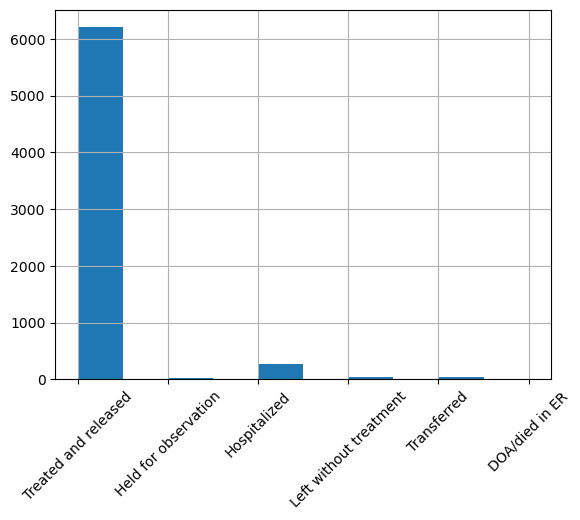

In [15]:
#Everything in the Disposition column looks like it belongs. Noticing a majority of the values are Treated and Released.
plt.clf()
inj_data['Disposition'].hist()
plt.xticks(rotation=45)
plt.show()

In [16]:
#Definitely looks categorical as there are only 3 numbers. 
#Per https://ridesdatabase.org/saferparks/data:
#product codes: 1293 (amusement devices), 3295 (water slides, public), and 3259 (go-karts).
inj_data['ProductCode'].info

<bound method Series.info of 0       1293
1       1293
2       1293
3       1293
4       3259
        ... 
6579    3259
6580    1293
6581    1293
6582    1293
6583    1293
Name: ProductCode, Length: 6584, dtype: int64>

In [17]:
#Will convert these values to strings so they can be used as categorical values. 

inj_data['ProductCode'] = inj_data['ProductCode'].apply(str)
inj_data['ProductCode'].info

<bound method Series.info of 0       1293
1       1293
2       1293
3       1293
4       3259
        ... 
6579    3259
6580    1293
6581    1293
6582    1293
6583    1293
Name: ProductCode, Length: 6584, dtype: object>

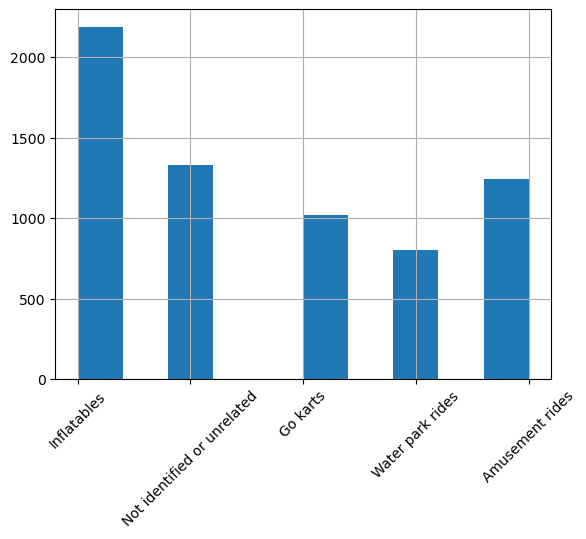

In [18]:
#There are a lot of not identified or unrelated fields. 
#This may limit what types of data we use in the exploratory analysis phase. 
plt.clf()
inj_data['Device_category'].hist()
plt.xticks(rotation=45)
plt.show()

In [19]:
#There is a lot of data in  the top 4 types, and then there are lot of unique/low count of types. 
#May make sense to convert thes to an Other type for analysis. 
inj_data['Device_type'].value_counts()

inflatable                        1993
go kart                           1018
water park                         801
amusement ride                     622
not identified                     364
go kart - home or street           349
roller coaster                     329
jumper (probably bounce house)     195
mechanical bull                    173
carousel                           134
haunted house                       93
ball pit                            57
bumper car                          47
arcade game                         38
slide                               33
spinning ride                       30
dunk tank                           26
unrelated                           25
playground                          23
laser tag                           21
water ride                          18
hamster ball                        17
maze                                17
fun house                           14
boxing game                         14
train ride               

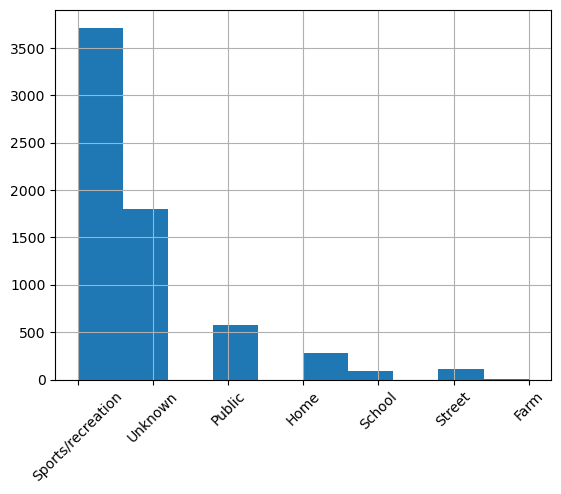

In [20]:
#There are a decent amount of Unknown locations which may impact how we use the data. 
plt.clf()
inj_data['Location'].hist()
plt.xticks(rotation=45)
plt.show()

## Save the data<a id='Save_Data'></a>

In [21]:
#Save the modified dataframe to a new .csv file called clean_data.csv
inj_data.to_csv("data/clean_data/clean_data.csv")

## Summary<a id='Summary'></a>

In this notebook, we have imported the data for theme park injuries from a .csv file and into the dateframe inj_data. We then viewed all the data types and non null values and found 2 main issues. 

The first issue was the Other_Diagnosis field having only 986 non null values. After investigating, we found that the only fields that had data were when there was a Diagnosis code of other. This means that Other_Diagnosis is only used when Other is used in the Diagnosis field. As a result, these null values would all be valid data so we will leave them as such. 

The second issue was due to the ProductCode being an int data type instead of a string/categorical value. After reviewing all the unique values, we saw that there are only three different numbers that are used for the product code, 1293, 3295, and 3259. After reviewing the original website from the date, we see that these product codes correspond to amusement rides (1293), water slides/public (3295), and go-karts (3259). As a result, we converting these ints to string so they can be used as categorical data instead of numerical data. 

Some other notes that we took note of but did not necessarily correct are as follows:

- In the Diagnosis Field, there are multiple Diagnosis with 10 or less entries. It may make sense to convert these to the Other diagnosis field if they are not very common diagnosis. 
- There are some unknown abreviations in the dataset for Other Diagnosis such as H/A, AMS, and N/S. Could not find a data dictionary for what those correspond to, but considering these are all in the Other Diagnosis field, these will most likley not be used in the actual analysis since htere are too many unique Diagnosis. 
- There were 13 non recorded body parts for the injuries. May need to remove these in exploratory data analysis. 
- A majority of the Disposition field is Treated and Released which means a majority of the injuries occurred were not severe. 
- There are a lot of not identified or unrelated fields for Device_category. May need to limit which types of devices are used in the exploratory analysis. 
- Over half of the Device Types appear 10 or less times so may need to combine a lot of the more unique ones into an Other category, or create different categories for the Device Types. 
- Unknown locations are the second highest Location total of all locations. This may impact how we can use this field. 

We took the cleaned dataset and saved it to the clean_data.csv file which will be ready for the next phase of analysis.  